<a href="https://colab.research.google.com/github/5791nbm/FinCoLab/blob/main/08_Interest_Rate_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ornstein-Uhlenbeck Processes

dx<sub>t</sub> = θ(μ-x<sub>t</sub>)dt + σ(dW<sub>t</sub>)

In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.random import normal

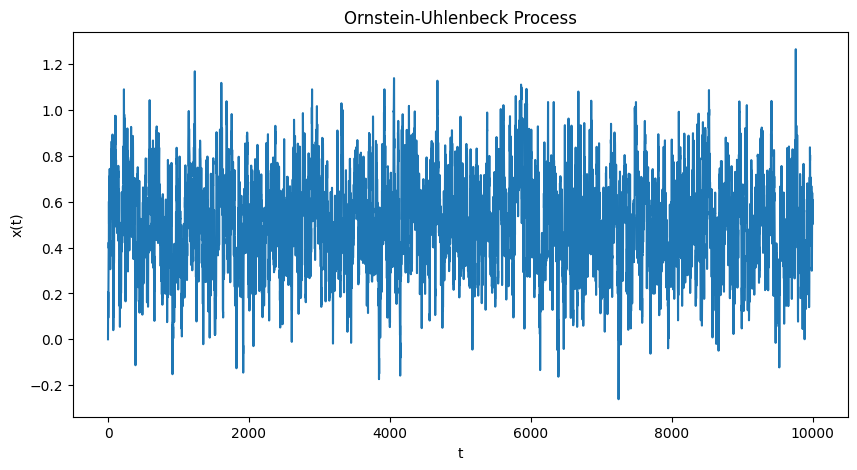

In [9]:
def generate_process(dt=0.1, theta=1.2, mu=0.5, sigma=0.3, n=10000):
  #x(t=0) = 0 and initialize x(t) with zeros
  x = np.zeros(n)

  for t in range(1, n):
    x[t] = x[t-1] + theta*(mu-x[t-1])*dt + sigma * normal(0, np.sqrt(dt))
  return x

def plot_process(x):
  plt.figure(figsize=(10, 5))
  plt.plot(x)
  plt.xlabel('t')
  plt.ylabel('x(t)')
  plt.title('Ornstein-Uhlenbeck Process')
  plt.show()

if __name__ == '__main__':
  data = generate_process()
  plot_process(data)

Vasicek model implementation (Interest rate model)

dr(t) = Κ(θ-r(t))dt + σ(dW(t))

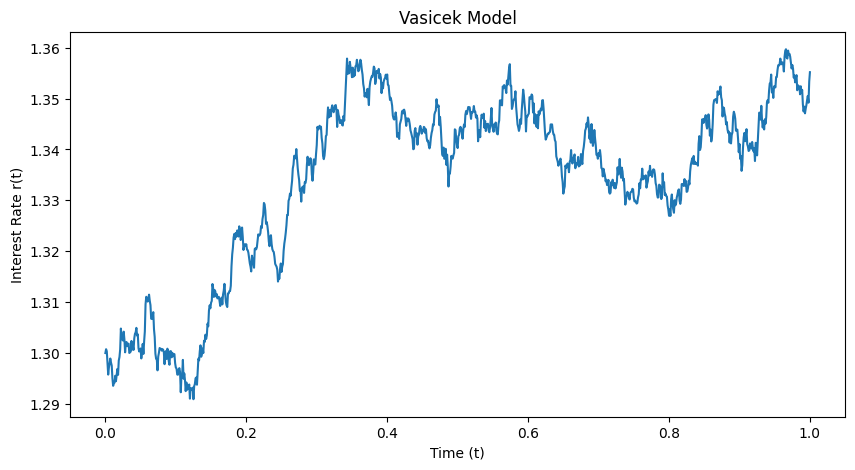

In [18]:
def vasicek_model(r0, kappa, theta, sigma, T=1., N=1000):
  dt = T/float(N)
  t= np.linspace(0, T, N+1)
  rates = [r0]

  for _ in range(N):
    dr = kappa*(theta-rates[-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
    rates.append(rates[-1] + dr)
  return t, rates

def plot_model(t, rates):
  plt.figure(figsize=(10, 5))
  plt.plot(t, rates)
  plt.xlabel('Time (t)')
  plt.ylabel('Interest Rate r(t)')
  plt.title('Vasicek Model')
  plt.show()

if __name__ == '__main__':
  time, data = vasicek_model(r0=1.3, kappa=0.9, theta=1.4, sigma=0.05)
  plot_model(time, data)